In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import time
import copy
import json
import math as ma

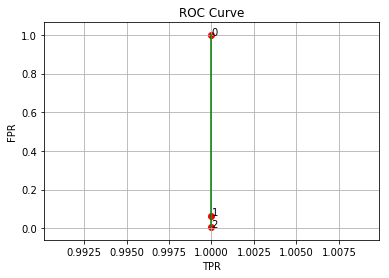

In [2]:
cascadeEvaluation = np.array([[1, 1], [1, 0.065], [1, 0.005]])
cascadeEvaluation[0:, 1]
fig, ax = plt.subplots()
ax.scatter(cascadeEvaluation[0:, 0], cascadeEvaluation[0:, 1], c="red")
ax.plot(cascadeEvaluation[0:, 0], cascadeEvaluation[0:, 1], c="green")
for i in range(3):
    ax.annotate(i, (cascadeEvaluation[i][0], cascadeEvaluation[i][1]))
plt.title("ROC Curve")
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.grid()
plt.show()

In [3]:

imageDictionary = {
    "image": [],
    "task1": [4, 5, 13, 14, 15],
    "grayImage": [],
    "faceDetectedImage": [],
    "realFaces": [],
    "realTarget": [],
    "targetDetection": []
}
cascadePath = "frontalface.xml"
cascade = cv.CascadeClassifier(cascadePath)

for i in range(16):
    image = cv.imread("./images/dart"+str(i)+".jpg")
    imageDictionary["image"].append(image)
    imageDictionary["grayImage"].append(cv.cvtColor(image, cv.COLOR_BGR2GRAY))


dummyImage = copy.deepcopy(imageDictionary["image"][5])

            




In [4]:
detectedFaceSquare = {
    
}
for i in range(len(imageDictionary["image"])):    
    face = copy.deepcopy(imageDictionary["grayImage"][i])
    faces = cascade.detectMultiScale(face, 1.1, 1, 0, (50,50), (300,300))
    detectedFaceSquare[str(i)] = []
    for (x,y,w,h) in faces:
        cv.rectangle(face,(x,y),(x+w,y+h),(0,0,255),2)
        detectedFaceSquare[str(i)].append([x, y, w, h])
    imageDictionary["faceDetectedImage"].append(face)


In [5]:
targetPath = "./dartcascade/cascade.xml"
targetCascade = cv.CascadeClassifier(targetPath)
detectedTarget = {
    
}

for i in range(len(imageDictionary["image"])):
    c = copy.deepcopy(imageDictionary["grayImage"][i])
    target = targetCascade.detectMultiScale(c, 1.1, 1, 0, (100,100), (250, 250)) 
    detectedTarget[str(i)] = []
    for (x,y,w,h) in target:
        cv.rectangle(c,(x,y),(x+w,y+h),(0,255,0),2)
        detectedTarget[str(i)].append([x, y, w, h])
    imageDictionary["targetDetection"].append(c)


In [6]:
croppedTargets= {
    
}
imgCounter = 0
for i in range(len(detectedTarget.keys())):
    croppedTargets[str(i)] = []
    for j in range(len(detectedTarget[str(i)])):
        x, y, h, w = detectedTarget[str(i)][j]
        crop_img = imageDictionary["grayImage"][i][y:y+h, x:x+w]
        croppedTargets[str(i)].append(crop_img)
        cv.imwrite('croppedTargets/image'+str(imgCounter+19)+'.jpg', crop_img) 
        imgCounter+=1

print (imgCounter)

50


In [7]:
def loadSquares():
    with open('squares.json', 'r') as f:
        a = json.load(f)
    return copy.deepcopy(a)

def loadTargets():
    with open('target.json', 'r') as f:
        a = json.load(f)
    return copy.deepcopy(a)

In [8]:
realTargetSquares = loadTargets()

----------------------------------------
0


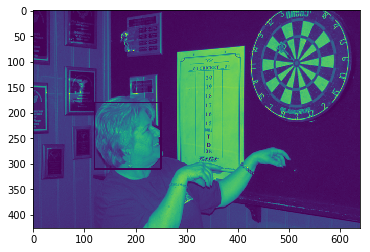

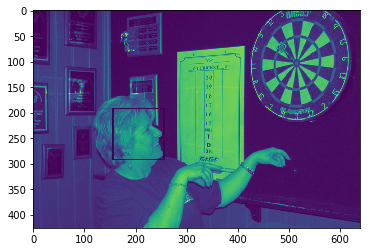

----------------------------------------
1


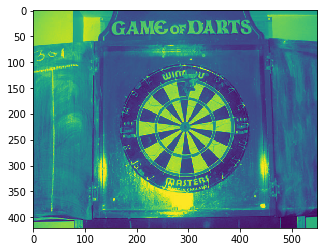

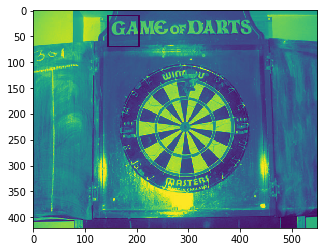

----------------------------------------
2


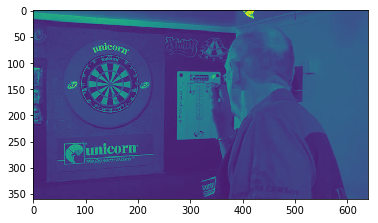

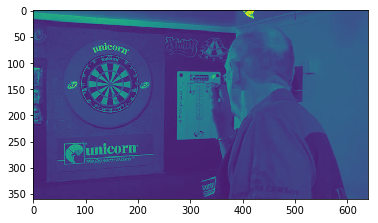

----------------------------------------
3


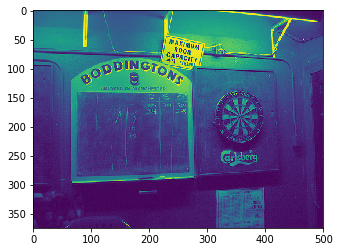

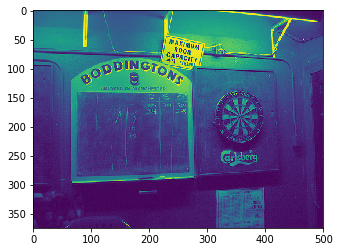

----------------------------------------
4


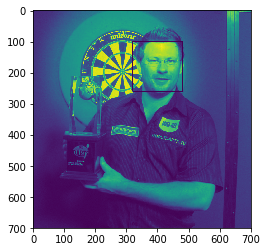

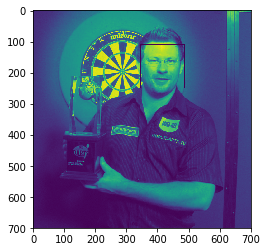

----------------------------------------
5


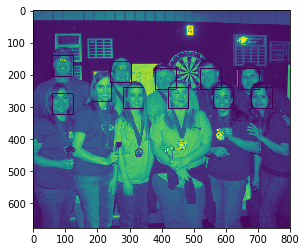

----------------------------------------
6


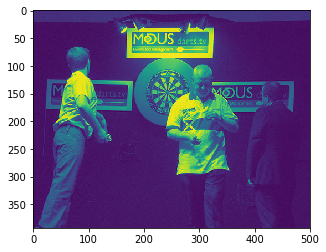

----------------------------------------
7


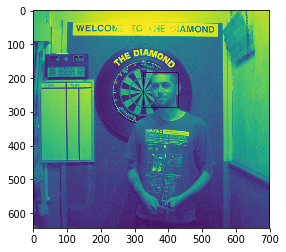

----------------------------------------
8


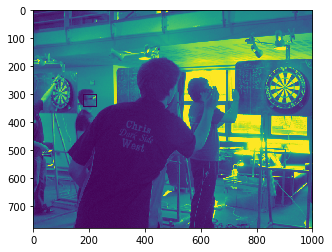

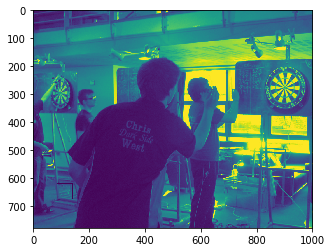

----------------------------------------
9


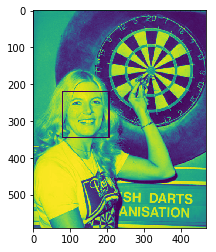

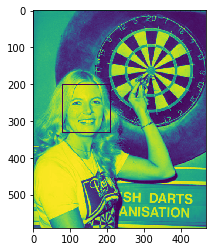

----------------------------------------
10


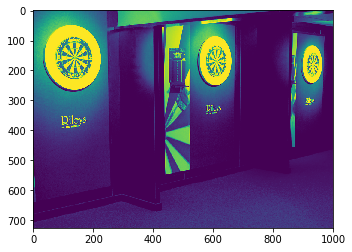

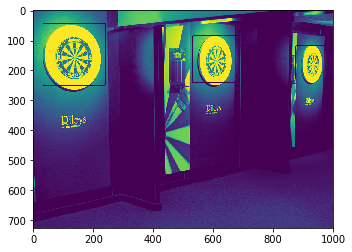

----------------------------------------
11


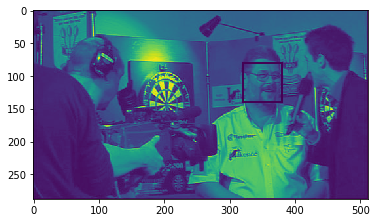

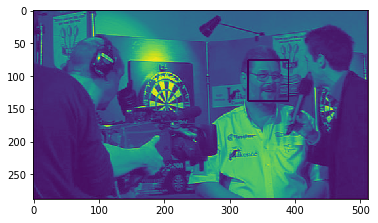

----------------------------------------
12


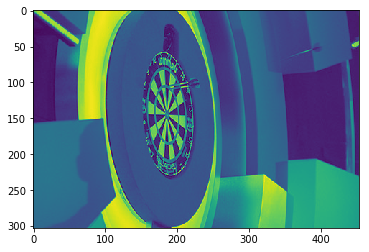

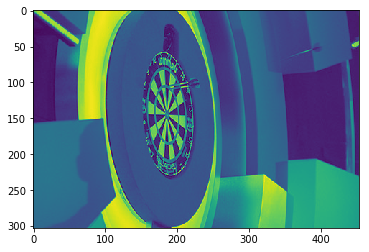

----------------------------------------
13


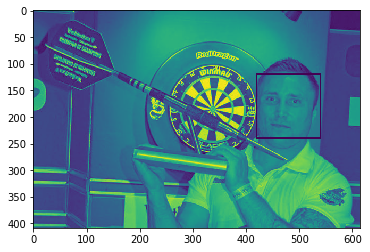

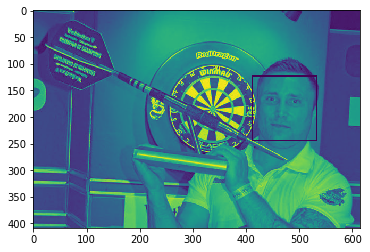

----------------------------------------
14


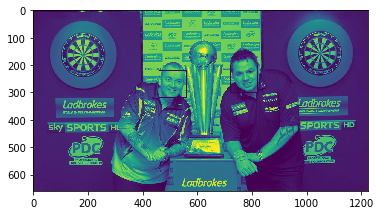

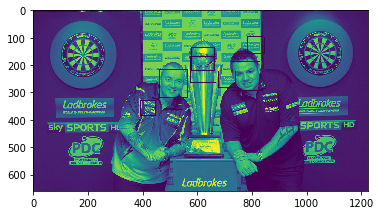

----------------------------------------
15


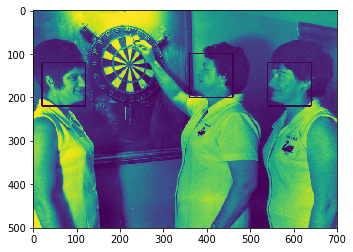

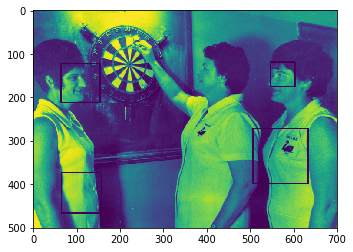

In [9]:
realFaceSquares = loadSquares()

for i in range(len(imageDictionary["image"])):
    c = copy.deepcopy(imageDictionary["grayImage"][i])
    for x, y, a in realFaceSquares[str(i)]:
        cv.rectangle(c, (x, y), (x + a, y+a), (0, 255, 255), 2)
    imageDictionary["realFaces"].append(c)
    print("----------------------------------------")
    print(i)
    plt.imshow(c)
    plt.show()
    plt.imshow(imageDictionary["faceDetectedImage"][i])
    plt.show()
    

In [10]:
def evaluation(real, predicted):
    evaluation = {}
    for i in range(len(real.keys())):
        numberOfFacesInImage = len(real[str(i)])
        facesDetected = len(predicted[str(i)])
        truePositives = 0
        falsePositives = 0
        for m in range(len(real[str(i)])):
            x, y, z = real[str(i)][m]
            for n in range(len(predicted[str(i)])):
                a, b, c, _ = predicted[str(i)][n]
                if abs(a - x) < 50 and abs(b-y) < 50:
                    truePositives += 1
                    break
        falsePositives = facesDetected - truePositives
        falseNegatives = numberOfFacesInImage - truePositives
        evaluation[str(i)] = [numberOfFacesInImage, facesDetected, truePositives, falsePositives, falseNegatives]
    return evaluation

In [11]:
def precision(truePositives, falsePositives):
    try:
        pre = truePositives/(truePositives + falsePositives)
        return pre
    except Exception:
        return None

def tpr(truePositives, falseNegatives):
    tp = truePositives/(truePositives + falseNegatives)
    return tp

    
def f1Score(precision, tpr):
    try:
        return 2*((precision*tpr)/(precision + tpr))
    except Exception:
        return None
    



In [12]:
def fullEval(ev, part1):
    avgt = 0
    avgp = 0
    avgf = 0
    includedImg = 16
    if part1:
        part1 = [4, 5, 13, 14, 15]
        for i in part1:
            current = ev[str(i)]
            p = precision(current[2], current[3])
            t = tpr(current[2], current[4])
            f1 = f1Score(p, t)
            avgp+=p
            avgt+=t
            avgf+= f1
            print("==========================================")
            print("Image Number: " + str(i))
            print("Precision: " + str(p))
            print("TPR: " + str(t))
            print("F1: " + str(f1))
        print("==========================================")
        print("TPR Average: " + str(avgt/5))
        print("Precision Average: " + str(avgp/5))
        print("F1 Average: " + str(avgf/5))
    else:
        for i in range(len(realTargetSquares.keys())):
            current = ev[str(i)]
            p = precision(current[2], current[3])
            t = tpr(current[2], current[4])
            f1 = f1Score(p, t)
            if p == None or f1 == None:
                includedImg -= 1
                continue
            avgp+=p
            avgt+=t
            avgf+= f1
            print("==========================================")
            print(i)
            print("Image Number: " + str(i))
            print("Precision: " + str(p))
            print("TPR: " + str(t))
            print("F1: " + str(f1))
        print("==========================================")
        print("TPR Average: " + str(avgt/includedImg))
        print("Precision Average: " + str(avgp/includedImg))
        print("F1 Average: " + str(avgf/includedImg))
        

    

ev = evaluation(realFaceSquares, detectedFaceSquare)

In [13]:
ev1 = evaluation(realTargetSquares, detectedTarget)
fullEval(ev1, False)

0
Image Number: 0
Precision: 0.5
TPR: 1.0
F1: 0.6666666666666666
1
Image Number: 1
Precision: 1.0
TPR: 1.0
F1: 1.0
2
Image Number: 2
Precision: 0.5
TPR: 1.0
F1: 0.6666666666666666
3
Image Number: 3
Precision: 0.2
TPR: 1.0
F1: 0.33333333333333337
4
Image Number: 4
Precision: 0.3333333333333333
TPR: 1.0
F1: 0.5
5
Image Number: 5
Precision: 0.3333333333333333
TPR: 1.0
F1: 0.5
6
Image Number: 6
Precision: 1.0
TPR: 1.0
F1: 1.0
7
Image Number: 7
Precision: 1.0
TPR: 1.0
F1: 1.0
8
Image Number: 8
Precision: 0.5
TPR: 1.0
F1: 0.6666666666666666
9
Image Number: 9
Precision: 1.0
TPR: 1.0
F1: 1.0
10
Image Number: 10
Precision: 0.5
TPR: 1.0
F1: 0.6666666666666666
12
Image Number: 12
Precision: 0.5
TPR: 1.0
F1: 0.6666666666666666
14
Image Number: 14
Precision: 0.11764705882352941
TPR: 1.0
F1: 0.21052631578947367
15
Image Number: 15
Precision: 1.0
TPR: 1.0
F1: 1.0
TPR Average: 1.0
Precision Average: 0.6060224089635854
F1 Average: 0.7055137844611529


In [14]:
def hough_line(image):    
    angles = np.deg2rad(np.arange(-90, 90))
    im_width, im_height = image.shape
    im_diag = int(np.round(np.sqrt(im_width**2 + im_height ** 2)))
    max_ps = np.linspace(-im_diag, im_diag, im_diag * 2)
        
    coses = np.cos(angles)
    sins = np.sin(angles)
    n_angles = len(angles)
    
    houghs = np.zeros((2 * im_diag, n_angles))
    
    
    for y in range(len(image)):
        for x in range(len(image[0])):
            if (image[y][x] == 255):
                for theta in range(n_angles):
                    p = int(np.round(x * coses[theta] + y * sins[theta])) + im_diag
                    houghs[p][theta] += 1
    
    return houghs, angles, max_ps

In [15]:
def get_threshold_line(houghs):
    
    over_threshold = []
    preYval = 0
    preXval = 0
    
    for i in range(0, 1000):
        over_threshold = []
        preYval = 0
        preXval = 0
        for y in range(len(houghs)):
            for x in range(len(houghs[0])):
                if houghs[y][x] > i:
                    if preYval < y or preXval < x:
                        over_threshold.append((y, x))
                        preYval = y
                        preXval = x    
        if len(over_threshold) <=  50:
            break
    
    return np.array(over_threshold)

In [16]:
def get_center_line(thresholded, image, max_ps, angles):
    lined = np.zeros(image.shape)
    for y in range(len(thresholded)):
        distance = max_ps[thresholded[y][0]]
        angle = angles[thresholded[y][1]]

        if angle != 0:
            m = -np.cos(angle) / np.sin(angle)
            b = distance / np.sin(angle)
        else:
            m = -np.cos(angle)
            b = distance

        for x in range(len(image[0])):
            y0 = int(np.round(m * x + b))
            
            if y0 >= 0 and y0 < len(image):
                lined[y0][x] += 1
    maximum = 0
    y1 = 0
    x1 = 0
    
    for y in range(len(lined[0])):
        for x in range(len(lined[1])):
            if lined[y][x] > maximum:
                maximum = lined[y][x]
                y1 = y
                x1 = x
    return (x1, y1)

In [17]:
def get_center_line(thresholded, image, max_ps, angles):
    lined = np.zeros(image.shape)
    for y in range(len(thresholded)):
        distance = max_ps[thresholded[y][0]]
        angle = angles[thresholded[y][1]]

        if angle != 0:
            m = -np.cos(angle) / np.sin(angle)
            b = distance / np.sin(angle)
        else:
            m = -np.cos(angle)
            b = distance

        for x in range(len(image[0])):
            y0 = int(np.round(m * x + b))
            
            if y0 >= 0 and y0 < len(image):
                lined[y0][x] += 1
    maximum = 0
    y1 = 0
    x1 = 0
    
    for y in range(len(lined[0])):
        for x in range(len(lined[1])):
            if lined[y][x] > maximum:
                maximum = lined[y][x]
                y1 = y
                x1 = x
    return (x1, y1)

In [18]:
def hough_circle(image, gradient, min_radius, max_radius):
            
    houghs = np.zeros((len(image),len(image[0]), max_radius - min_radius))
    print(len(image),len(image[0]))
    for y in range(0, len(image)):
        for x in range(0, len(image[0])):
            if image[y][x] == 255:
                 for w in range(min_radius - 1, max_radius):
                        x_weight = w * np.sin(gradient[y][x])
                        y_weight = w * np.cos(gradient[y][x])

                        x1 = int(round(abs(x - x_weight)))
                        y1 = int(round(abs(y - y_weight)))

                        if y1 >= 0 and x1 >= 0 and y1 < len(image) and x1 < len(image[0]):
                            houghs[y1][x1][w - min_radius] += 1

                            
    return houghs

In [24]:
def get_threshold_circle(houghs, min_radius):
    over_threshold = []
    previous_over_threshold = []
    
    preXval = 0
    preYval = 0
    
    for j in range(1000):
        over_threshold = []
        preXval = 0
        preYval = 0
        for y in range(len(houghs)):
            for x in range(len(houghs[0])):
                for w in range(len(houghs[0][1])):
                    if houghs[y][x][w] > j:
                        if preXval < x or preYval < y:
                            over_threshold.append((x, y, w + min_radius, houghs[y][x][w]))
                            preXval = x
                            preYval = y

        if len(over_threshold) <= 150:
            if len(over_threshold) == 0:
                over_threshold = copy.deepcopy(previous_over_threshold)
            break
        else:
            previous_over_threshold = copy.deepcopy(over_threshold)
            
    return np.array(over_threshold)

In [20]:
def get_center_circle(thresholded):
    sumX = 0
    sumY = 0
    sumR = 0
    num = 0
    
    for i in range(len(thresholded)):
        sumX += thresholded[i][0]
        sumY += thresholded[i][1]
        sumR += thresholded[i][2]
        num += 1
    
    avgX = int(np.round(sumX/num))
    avgY = int(np.round(sumY/num))
    avgR = int(np.round(sumR/num))
    
    return (avgX, avgY, avgR)

In [21]:
def drewCircle(image, thresholded):
    for i in range(len(thresholded)):
        cv.circle(image, (thresholded[i][0], thresholded[i][1]), thresholded[i][2], 255, 1)

In [22]:
def magnitude(img):
    gradient = np.zeros(img.shape)
    src = copy.deepcopy(img)
    src = cv.GaussianBlur( src, (3,3), 0, 0);
    sobelx = cv.Sobel(src,cv.CV_64F,1,0,ksize=3)  # x
    sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)  # y
    gradient = cv.phase(sobely, sobelx, False)
            
    return cv.addWeighted(cv.convertScaleAbs(sobelx), 0.5, cv.convertScaleAbs(sobely), 0.5, 0), gradient

106 106
It's not a target


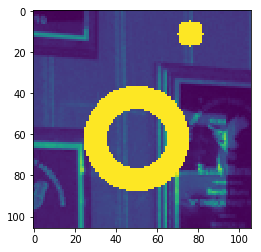

158 158
It's a target


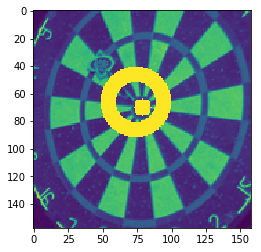

163 163
It's a target


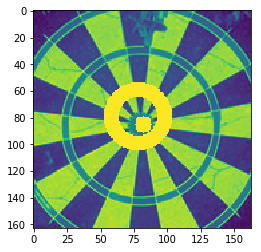

131 131
It's a target


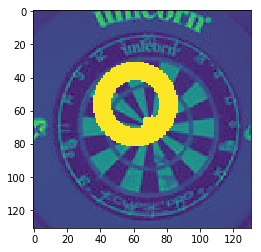

217 217
It's not a target


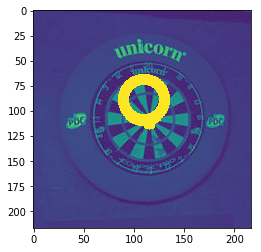

104 104
It's not a target


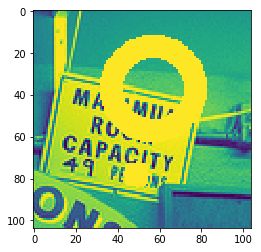

129 129
It's not a target


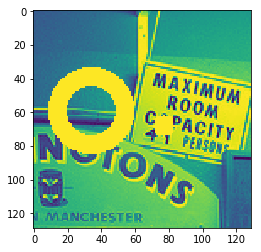

106 106
It's a target


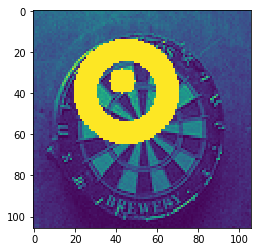

139 139
It's not a target


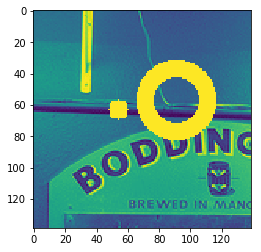

142 142
It's not a target


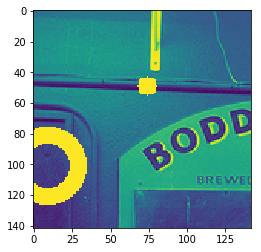

163 163
It's a target


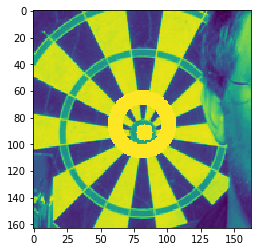

142 142
It's not a target


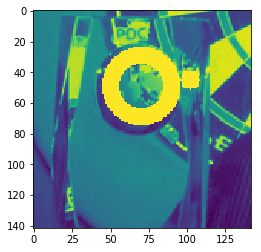

207 207
It's not a target


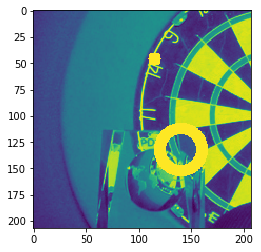

121 121
It's a target


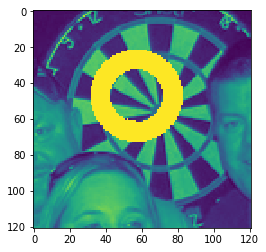

106 106
It's not a target


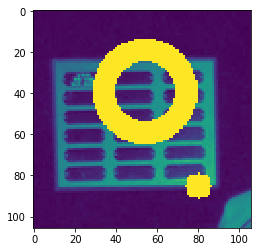

188 188
It's not a target


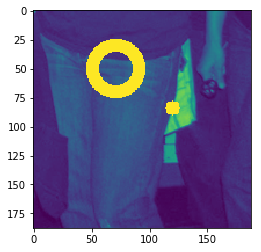

217 217
It's not a target


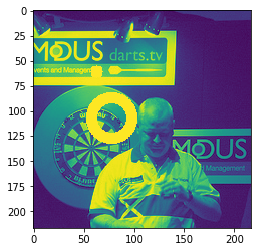

170 170
It's not a target


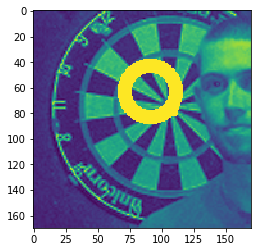

125 125
It's not a target


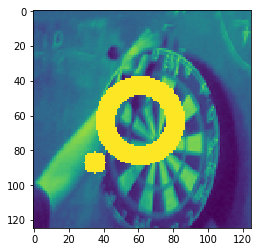

111 111
It's not a target


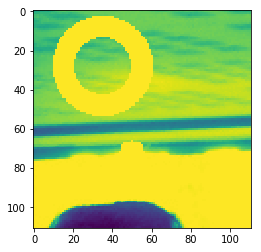

131 131
It's a target


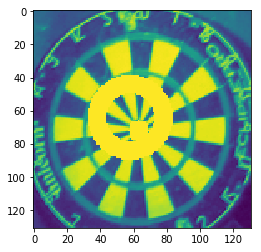

128 128
It's not a target


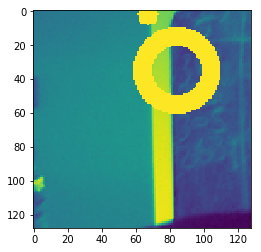

202 202
It's not a target


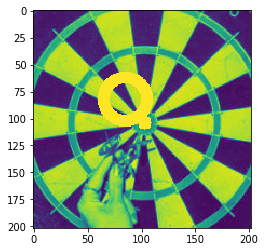

124 124
It's not a target


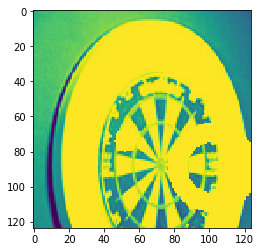

111 111
It's not a target


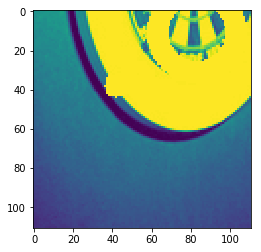

186 186
It's not a target


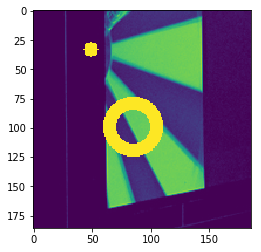

128 128
It's a target


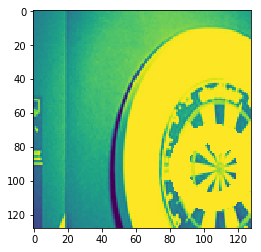

194 194
It's not a target


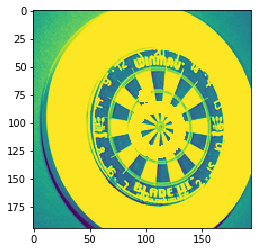

202 202
It's not a target


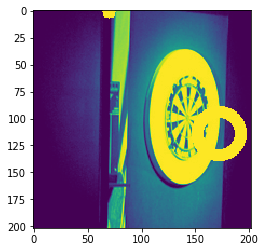

108 108
It's a target


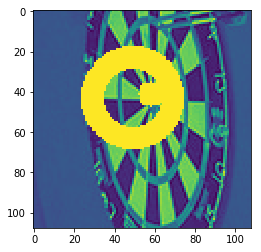

130 130
It's a target


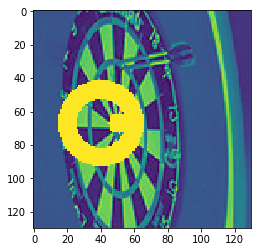

104 104
It's not a target


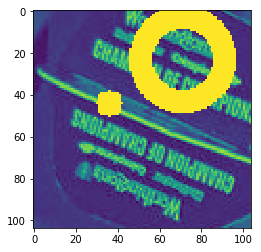

115 115
It's not a target


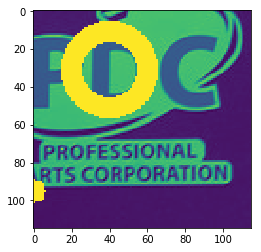

109 109
It's not a target


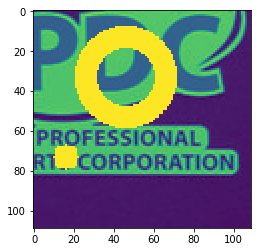

111 111
It's not a target


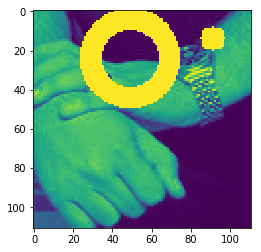

194 194
It's a target


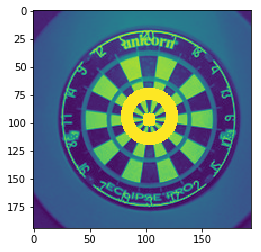

109 109
It's not a target


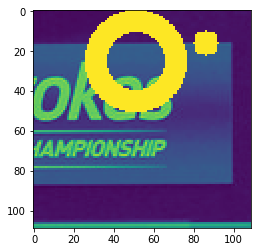

106 106
It's not a target


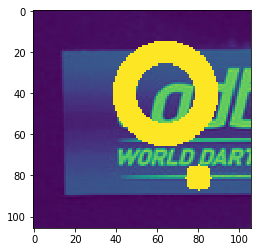

123 123
It's not a target


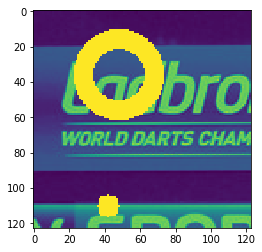

126 126
It's not a target


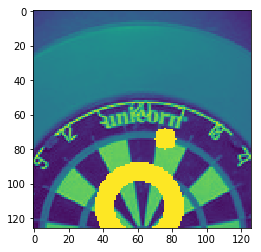

138 138
It's not a target


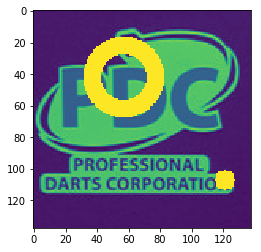

157 157
It's not a target


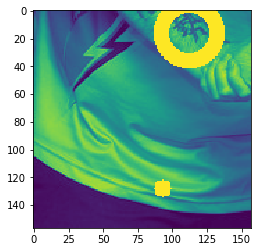

183 183
It's a target


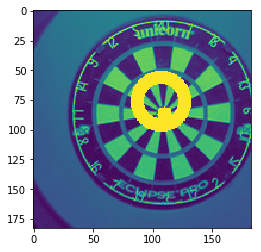

148 148
It's not a target


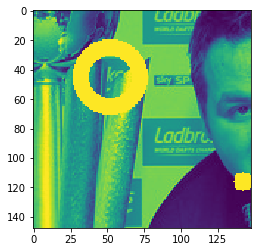

185 185
It's not a target


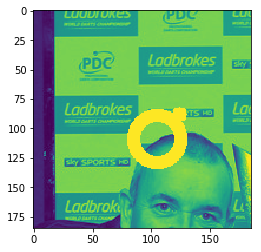

218 218
It's not a target


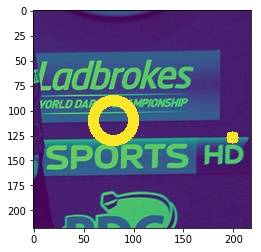

205 205
It's not a target


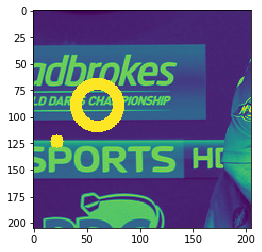

217 217
It's a target


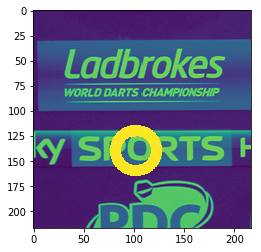

197 197
It's not a target


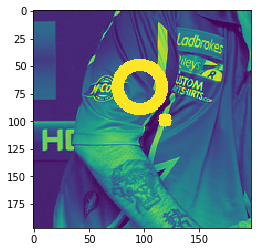

128 128
It's a target


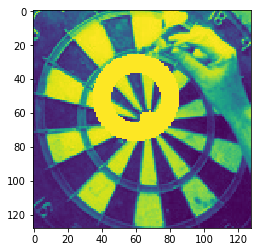

In [28]:
def runHoughTransform(croppedTargets):
    target = {}
    data_points = {}
    for item in croppedTargets:
        target[item] = []
        data_points[item] = []
        for i in range(len(croppedTargets[item])):
            original = croppedTargets[item][i]
            mag, gradient = magnitude(original)
            mag_copy = np.copy(mag)
            mag_copy[mag_copy >= 50] = 255
            mag_copy[mag_copy < 50] = 0
            accumulator, angles, max_ps = hough_line(mag_copy)
            thresholded = get_threshold_line(accumulator)
            circle_accumulator = hough_circle(mag_copy, gradient, 20, len(mag_copy[0]))
            circle_thresholded = get_threshold_circle(circle_accumulator, 20)
            circle_center = get_center_circle(circle_thresholded)
            center = np.copy(original)
            cv.circle(center, (circle_center[0], circle_center[1]), 20, 255, 10)
            maximum = get_center_line(thresholded, original, max_ps, angles)
            cv.circle(center, maximum, 1, 255, 10)
            dist = np.sqrt((maximum[0] - circle_center[0]) ** 2 + (maximum[1] - circle_center[1]) ** 2)
            data_points[item].append((circle_center, maximum))
            if dist < 20:
                print("It's a target")
                target[item].append(True)
            else:
                print("It's not a target")
                target[item].append(False)
            
            plt.imshow(center)
            plt.show()
        
    with open('classification.json', 'w') as f:
        a = json.dump(target, f, separators = (',',': '), indent = 4)
        
    with open('points.json', 'w') as g:
        b = json.dump(data_points, g, separators = (',',': '), indent = 4)
    
    return target, data_points

target, data_points = runHoughTransform(croppedTargets)


In [29]:
croppedCopy = copy.deepcopy(detectedTarget)
croppedHey = {}

number = 0 

for i in detectedTarget.keys():
    number += len(detectedTarget[i])

print(number)
for i in target.keys():
    croppedHey[str(i)] = []
    c1 = copy.deepcopy(imageDictionary["image"][int(i)])
    for j in range(len(target[str(i)])):
        if target[str(i)][j]:
            croppedHey[str(i)].append((croppedCopy[str(i)][j]))
            x, y, w, h = detectedTarget[str(i)][j]
            cv.rectangle(c1,(x,y),(x+w,y+h),(0,255,0),2)
    cv.imwrite("test/image"+str(i)+".jpg", c1)
            
            
            




50


In [30]:
for i in range(len(imageDictionary["image"])):
    c = copy.deepcopy(imageDictionary["image"][i])
    target = targetCascade.detectMultiScale(c, 1.1, 1, 0, (100,100), (250, 250)) 
    detectedTarget[str(i)] = []
    for (x,y,w,h) in target:
        cv.rectangle(c,(x,y),(x+w,y+h),(0,255,0),2)
        detectedTarget[str(i)].append([x, y, w, h])
    imageDictionary["targetDetection"].append(c)
for i in range(len(imageDictionary["image"])):
    c = copy.deepcopy(image)

In [31]:
ev2 = evaluation(realTargetSquares, croppedHey)
print(ev2)
fullEval(ev2, False)


{'0': [1, 1, 1, 0, 0], '1': [1, 1, 1, 0, 0], '2': [1, 1, 1, 0, 0], '3': [1, 1, 1, 0, 0], '4': [1, 1, 1, 0, 0], '5': [1, 1, 1, 0, 0], '6': [1, 0, 0, 0, 1], '7': [1, 0, 0, 0, 1], '8': [2, 1, 1, 0, 1], '9': [1, 0, 0, 0, 1], '10': [3, 1, 0, 1, 3], '11': [1, 0, 0, 0, 1], '12': [1, 2, 1, 1, 0], '13': [1, 0, 0, 0, 1], '14': [2, 3, 0, 3, 2], '15': [1, 1, 1, 0, 0]}
0
Image Number: 0
Precision: 1.0
TPR: 1.0
F1: 1.0
1
Image Number: 1
Precision: 1.0
TPR: 1.0
F1: 1.0
2
Image Number: 2
Precision: 1.0
TPR: 1.0
F1: 1.0
3
Image Number: 3
Precision: 1.0
TPR: 1.0
F1: 1.0
4
Image Number: 4
Precision: 1.0
TPR: 1.0
F1: 1.0
5
Image Number: 5
Precision: 1.0
TPR: 1.0
F1: 1.0
8
Image Number: 8
Precision: 1.0
TPR: 0.5
F1: 0.6666666666666666
12
Image Number: 12
Precision: 0.5
TPR: 1.0
F1: 0.6666666666666666
15
Image Number: 15
Precision: 1.0
TPR: 1.0
F1: 1.0
TPR Average: 0.9444444444444444
Precision Average: 0.9444444444444444
F1 Average: 0.925925925925926
